In [22]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision
from torchvision import transforms

In [23]:
trainset = torchvision.datasets.MNIST(root='data/', 
                                      train=True, 
                                      transform = torchvision.transforms.Compose([
                                          transforms.Resize(10),
                                          transforms.ToTensor()]),
                                      download=True)

testset = torchvision.datasets.MNIST(root='data/', 
                                     train=False,
                                     transform = torchvision.transforms.Compose([
                                         transforms.Resize(10), 
                                         transforms.ToTensor()]), 
                                     download=True)

torch.Size([1, 10, 10])
torch.Size([10, 10])
tensor(4)


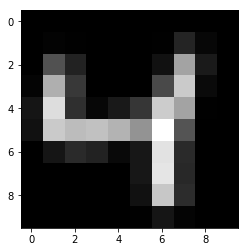

In [24]:
import matplotlib.pyplot as plt
img = trainset[2][0]
print(img.shape)
img = img.reshape(10, 10)
print(img.shape)
print(trainset[2][1])
plt.gray()
plt.imshow(img)

In [25]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=False)

In [26]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(100, 25)
        self.fc2 = nn.Linear(25, 10)
        
    def forward(self, x):
        z1 = F.relu(self.fc1(x.view(16, -1)))
        out = self.fc2(z1)
        return out, z1

In [27]:
net = Net()

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [29]:
num_epochs = 50
for epoch in range(num_epochs):
    print('Epoch: {}/{}'.format(epoch+1, num_epochs))
    print('='*10)
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs[0], labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    print('train loss: {}\n'.format(running_loss/len(trainset)))

print('Finished Training')

Epoch: 1/50
train loss: 1.4608950390418372

Epoch: 2/50
train loss: 0.5469565985600153

Epoch: 3/50
train loss: 0.42869625862836835

Epoch: 4/50
train loss: 0.38552753401199974

Epoch: 5/50
train loss: 0.36074226867755255

Epoch: 6/50
train loss: 0.3435155544757843

Epoch: 7/50
train loss: 0.33047321452299755

Epoch: 8/50
train loss: 0.31948010784387587

Epoch: 9/50
train loss: 0.30968598599036534

Epoch: 10/50
train loss: 0.30148920783201855

Epoch: 11/50
train loss: 0.29369012871980665

Epoch: 12/50
train loss: 0.28634658986727396

Epoch: 13/50
train loss: 0.27918108528057733

Epoch: 14/50
train loss: 0.2728458710988363

Epoch: 15/50
train loss: 0.2665171367605527

Epoch: 16/50
train loss: 0.26050397286812466

Epoch: 17/50
train loss: 0.25470597845315934

Epoch: 18/50
train loss: 0.24939059560696283

Epoch: 19/50
train loss: 0.24396199404795965

Epoch: 20/50
train loss: 0.2391874850889047

Epoch: 21/50
train loss: 0.2344601084947586

Epoch: 22/50
train loss: 0.2299854279836019

Epoch

In [30]:
net.fc2.weight.data.shape

torch.Size([10, 25])

In [32]:
running_correct = 0
for data in testloader:
    images, labels = data
    outputs = net(images)
    _, preds = torch.max(outputs[0], 1)
    running_correct += (preds == labels).sum().item()

print('test acc: {}'.format(running_correct/len(testset)))

test acc: 0.9549


In [33]:
torch.save(net, 'trained-models/net_02.pth')

C:\Users\ADMIN\Anaconda3\envs\machlearn\lib\site-packages\torch\serialization.py:241: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [34]:
model = torch.load('trained-models/net_02.pth')

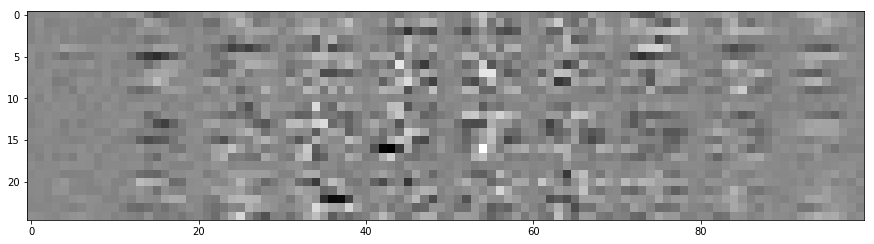

In [35]:
plt.figure(figsize=(15, 5))
plt.imshow(model.fc1.weight.data)

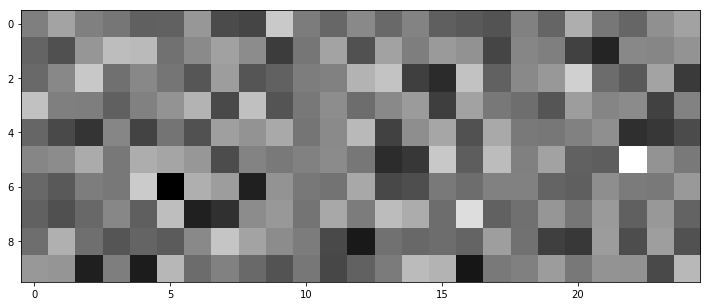

In [36]:
plt.figure(figsize=(15, 5))
plt.imshow(model.fc2.weight.data)